# Programação Linear Inteira

<a target="_blank" href="https://colab.research.google.com/github/glaucogoncalves/nio/blob/main/lectures/02_03_ILP.ipynb"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


|Model Type|Objective Function|Constraints|Decision variables|
|---|---|---|---|
|Integer (Linear) Programming (IP or ILP)| linear | linear | discrete |
|Mixed Integer (Linear) Programming (MIP or MILP)| linear | linear | discrete and continuous |
|Binary (Linear) Programming (BP or BLP)| linear | linear | binary |
|Mixed Binary (Linear) Programming (MBP or MBLP)| linear | linear | binary and continous |
|Binary Integer (Linear) Programming (BIP or BILP)| linear | linear | discrete and binary |

## Typical Problems

* Task Assigment Problem (Accepts relaxed solution)
* Shortest path problem (Accepts relaxed solution)
* Knapsack Problem
* Traveling Salesperson Problem
* Facility Location

## Numerical Solution

**Exact**
* Branch-and-bound
* Linear relaxation
* Other: branch-and-cut, Benders decomposition

**Approximations**
* Specific heuristics (search guided by intuition, rules and general ideas, aiming to find a good solution)
* Meta-heuristics (search with high-level strategies, including intensification and diversification, seeking to escape local optima)
  * Taboo search
  * *Simulated annealing*
  * *Greedy randomized adaptive search procedures* (GRASP)
  * Genetic algorithms
  * Ant Colony Optimization
  * Particle Swarm Optimization

# Relaxação Linear

* É a eliminação das restrições de integralidade das variáveis (e/ou a restrição de que as variáveis são binárias), recaindo em um problema de programação linear.
* **Em alguns problemas**, mesmo após a relaxação das restrições de integralidade do problema original de PI e resolução pelo método Simplex, por exemplo, a solução obtida pode ainda satisfazer as condições de integralidade
  * Ex: problema de designação de tarefas e problema do caminho mais curto
* **Em muitos casos**, não é possível obter diretamente a solução ótima do problema original de PI por meio do relaxamento das condições de integralidade. Uma alternativa nesses casos é o **arredondamento** da solução obtida.
  * <u>Alerta 1</u>: o arredondamento pode resultar em uma nova solução infactível
  * <u>Alerta 2</u>: se factível, não há garantia de que a nova solução arredondada seja a solução ótima do problema de programação inteira original (exemplo abaixo)

## Exemplo

$
\max z = 4x_1 + 3x_2 \\
s.t. \\
5x_1 + 3x_2 \leq 22 \\
2x_1 + 2x_2 \leq 11 \\
x_1,x_2 \geq 0 \\
x_1,x_2 \; \text{são inteiros}
$

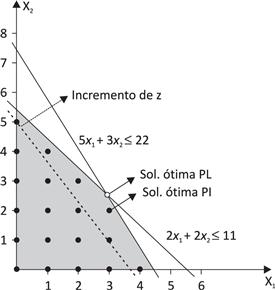

A área sombreada representa a região factível do problema relaxado, cuja solução ótima é o ponto $(x_1, x_2) = (2.75, 2.75)$. Já os demais pontos da área sombreada representam as soluções inteiras viáveis do problema, que tem como solução ótima o ponto $(x_1, x_2) = (3, 2)$.

Observe que as soluções inteiras viáveis consistem em apenas 19 pontos discretos, incluindo $(0, 0)$, e todos eles pertencem à região factível do problema relaxado.

Observe que a relaxação linear neste caso, gerou uma solução não-inteira e que o arredondadamento ($(x_1,x_2) = (3,3)$) gera uma solução não factível.

**Podemos afirmar que a região factível do problema relaxado sempre englobará todas as soluções inteiras viáveis do problema de PI original e, consequentemente, sua respectiva solução ótima.**

Não se conhece nenhum algoritmo para solução de problemas de PI, <u>em geral</u>, que parte de uma SBF inicial e encontra uma SBF melhor a cada iteração (como no Simplex para PL). Em resumo, **apesar da região factível de um problema de PI ser um subconjunto da região factível do problema original relaxado, um problema de PI é muito mais difícil de ser resolvido que um problema de PL**.

# Branch-and-Bound

* Proposto em 1960 por Land e Doig para solução de problemas de programação binária e inteira.
* Método de divisão e conquista (problema original é convertido em subproblemas menores)
* Passos principais: Ramificação e Eliminação
* Estrutura da solução é uma árvore cujos nós representam subproblemas e os enlaces conectando dois nós da árvore representam novas restrições a serem adicionadas ao modelo

## Exemplo

$
\min z = 2x_1 + 3x_2 + 2x_3 \\
s.t. \\
2x_1 + 2x_2 \geq 2 \\
6x_1 + 4x_2 + 4x_3 \geq 6 \\
x_1,x_2,x_3 \in {0,1}
$

A árvore **completa** de solução deste problema é vista abaixo. Devemos pesquisar ao longo dos nós desta árvore (busca em largura ou busca em profundidade)

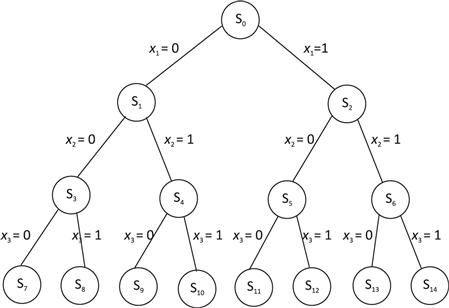

1. Em $S_0$ resolvemos o problema original relaxado pelo método Simplex
2. Esta solução (que não é inteira) é um limite inferior para o PLI (lembre-se que a solução do PLI está dentro do espaço de soluções do PL)
3. Como $S_0$ não é solução do PLI, devemos adicionar nova restrição ao problema ($x_1=0$ ou  $x_1=1$) para ramificar dois novos problemas e os colocamos em uma lista.
4. Observe que na prática, é inviável considerar todas as possíveis soluções, usamos a elimiação para evitar caminhos com soluções infactíveis.

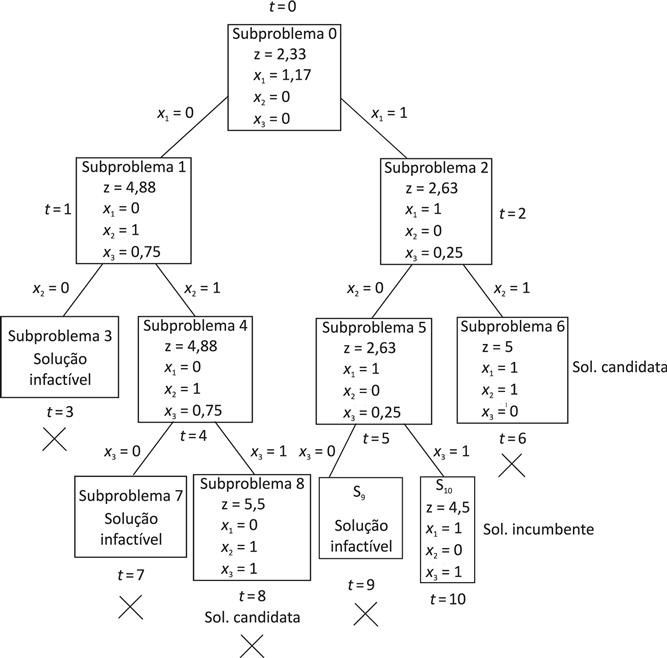

## Algoritmo para PLB

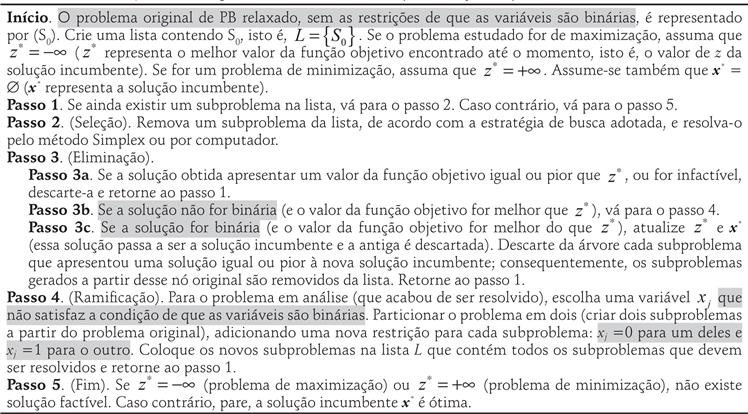

### Exemplo

$
\max z = 4x_1 + 3x_2 + 2x_3 \\
s.t. \\
2x_1 + 2x_2 + 4x_3 \geq 8 \\
3x_1 + 2x_2 + 3x_3 \geq 6 \\
4x_1 + 3x_2 +2x_3 \geq 7 \\
x_1,x_2,x_3 \in \{0,1\}
$

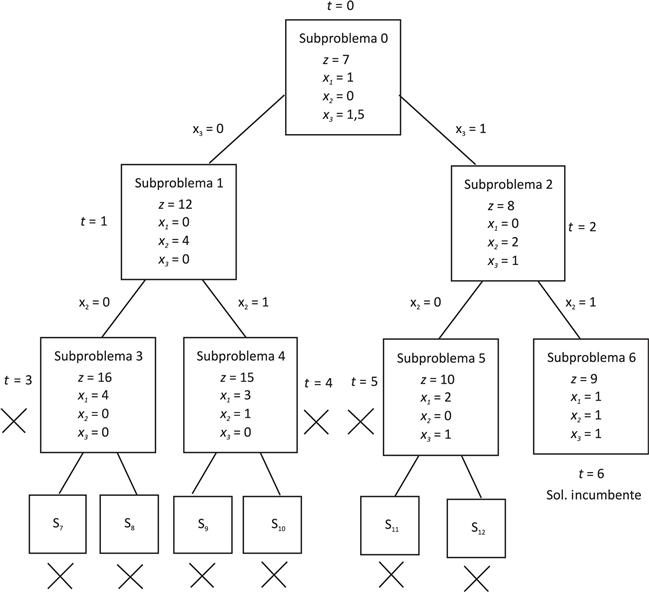

## Algoritmo para PLI

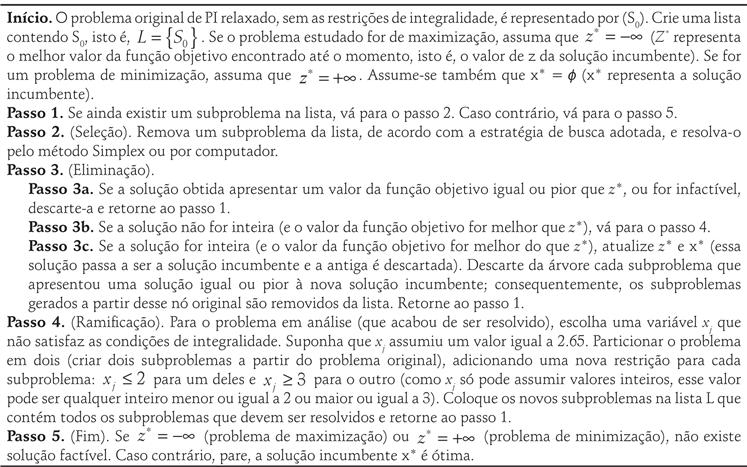

### Exemplo

$
\max z = 4x_1 + 5x_2 \\
s.t. \\
5x_1 + 7x_2 \leq 44 \\
4x_1 + 2x_2 \leq 27 \\
6x_1 + 3x_2 \leq 24 \\
x_1,x_2 \geq 0 \\
x_1,x_2 \; \text{são inteiros}
$

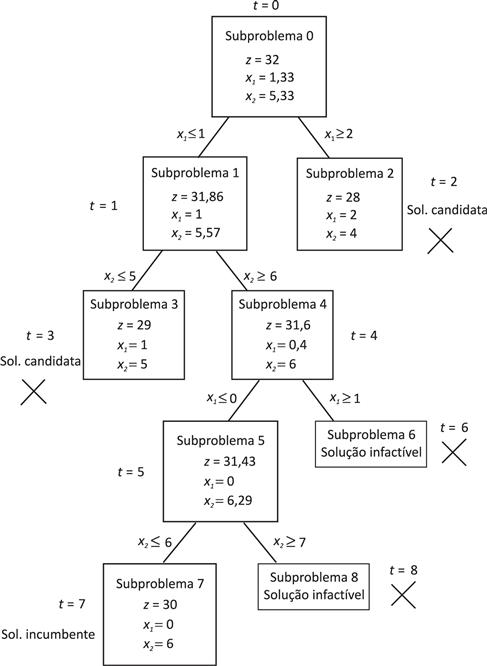

## Algoritmo para PLBM ou PLIM

Mesmo do que já foi mostrado, com as seguintes mudanças:
* na fase de ramificação, consideramos apenas as variáveis que necessitam ser inteiras (ou binárias).
* no passo 3c, para que uma solução seja considerada candidata, somente as variáveis necessárias devem ser inteiras (ou binárias)

# Alguns problemas inteiros/binários clássicos

## Preparação

In [ ]:
!pip install -q pyomo
!apt install coinor-cbc
!apt install glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5
  coinor-libosi1v5
The following NEW packages will be installed:
  coinor-cbc coinor-libcbc3 coinor-libcgl1 coinor-libclp1
  coinor-libcoinutils3v5 coinor-libosi1v5
0 upgraded, 6 newly installed, 0 to remove and 18 not upgraded.
Need to get 2,908 kB of archives.
After this operation, 8,310 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 coinor-libcoinutils3v5 amd64 2.11.4+repack1-2 [465 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 coinor-libosi1v5 amd64 0.108.6+repack1-2 [275 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 c

## Problema do Caminho mais Curto

Dado que:
* Grafo $G=(N,E)$ com cada aresta tendo um peso $w_{i,j}$ positivo
* $O$ é a origem e $T$ é o destino
* $x_{ij}$ indica se uma aresta do grafo está sendo usada no caminho

---



$
\min \sum_{i}\sum_{j} w_{ij}x_{ij} \\
\text{s.t.} \\
\sum_j x_{ij} = 1, \; \text{se} \; i = O \\
\sum_k x_{ki} = 1, \; \text{se} \; i = T \\
\sum_k x_{ki} - \sum_j x_{ij}  = 0, \; \forall i,j \in E \; \text{se} \; i \neq O,T \;\\
x_{ij} \in {0,1}, \;
$

###Solução

1. Simplex $O(2^n)$
2. Algoritmo de Djikstra

### Algoritmo de Djikstra

**Observação**: O algoritmo resolve o problema da árvore de menores caminhos, que é um problema ligeiramente diferente. Contudo o mesmo algoritmo pode ser usado para o problema acima, bastando parar o laço das linhas 6-11 quando encontrar o nó de destino ($T$).

---
**Entradas**

$G = (N,E)$: um grafo com cada aresta $(u,v)$ tendo peso $w_{u,v}$ \\
$u$: Um nó inicial tal que $u \in N$

---

**Saídas**

$T = (N,S)$: Uma árvore com um conjunto de arestas $S \subset E$ tal que, $\forall v \in N$, a distância $d(u,v)$ é mínima \\

---

**Algoritmo**
1. Para cada nó $v \in N$, faça:
2. $\;$ Se os nós $u$ e $v$ estão conectados em $G$
3. $\;$ Então incialize a distância $d(u,v) = w_{u,v}$
4. $\;$ Senão incialize a distância $d(u,v) = \infty$
5. Inicialize a árvore $T$ com o nó $u$
6. Repita
7. $\;$ Selecione o nó $v$, ainda não pertecente à árvore, cuja distância $d(u,v)$ é a menor
8. $\;$ Adicione à $T$ o nó $v$ e a aresta que liga $u$ a $v$
9. $\;$ Para cada nó $s$ conectado a $v$, faça:
10. $\; \; \;$ $d(u,s) = min(d(u,s),d(u,v)+w_{v,s})$
11. Até que todos os nós de $G$ sejam adicionados à $T$

---

### Conclusão
* Nem todo problema inteiro é NP-Difícil
* Alguns problemas inteiros podem ser resolvidos por relaxação linear (a solução relaxada encontrada é inteira)

## Problema do Caixeiro-Viajante

* $c_{ij}$ custo ou distância da cidade $i$ para a cidade $j$, com $i = 1,\ldots, n$ e $j = 1,\ldots, n$.
* $N$ é o conjunto de cidades



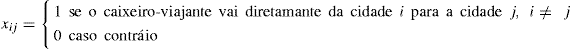

Formulação de Dantzig–Fulkerson–Johnson

$
\min z = \sum_{i=1}^{n}\sum_{j=1}^{n} c_{ij}x_{ij} \\
s.t. \\
\sum_{i=1}^n x_{ij} = 1 \; \forall j \in N \\
\sum_{j=1}^n x_{ij} = 1 \; \forall i \in N \\
\sum_{i \in S}\sum_{j \in S} x_{ij} \leq |S|-1 \;\;\; \forall S \subset N \; \\
x_{ij} \in \{0,1\}
$

**Atenção**: O terceiro grupo de restrições é sutil. Observe que temos um número exponencial de restrições! Um outro ponto importante (não descrito no modelo) é que desprezamos:
1. o subconjunto vazio (gera uma impossibilidade)
2. todo os subconjuntos com apenas um nó (as variáveis de decisão onde $i = j$ não são de interesse)
3. o subconjunto formado por todos os nós (o resultado do problema deve ser um ciclo entre todos os nós)

### Exemplo

Considere um problema simétrico do caixeiro-viajante com cinco cidades cujas coordenadas (x, y) estão especificadas na tabela abaixo. Modele o problema do caixeiro-viajante e resolva-o com um solver e a biblioteca pyomo.

|Cidade|	x|	y|
|---|---|---|
|1|	10|	30|
|2|	20|	50|
|3|	50|	90|
|4|	70|	30|
|5|	90|	50|

Este problema depende inicialmente do cálculo da distância entre as cidades. Como temos as coordenadas de cada cidade, podemos fazer isso usando a distância euclidiana. Assim para os pontos $(x_i,y_i)$ e $(x_j,y_j)$ temos que

$d = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}$

O código abaixo computa a matriz de distâncias $D$

{(1, 1): 0.0, (1, 2): 22.36, (1, 3): 72.11, (1, 4): 60.0, (1, 5): 82.46, (2, 1): 22.36, (2, 2): 0.0, (2, 3): 50.0, (2, 4): 53.85, (2, 5): 70.0, (3, 1): 72.11, (3, 2): 50.0, (3, 3): 0.0, (3, 4): 63.25, (3, 5): 56.57, (4, 1): 60.0, (4, 2): 53.85, (4, 3): 63.25, (4, 4): 0.0, (4, 5): 28.28, (5, 1): 82.46, (5, 2): 70.0, (5, 3): 56.57, (5, 4): 28.28, (5, 5): 0.0}


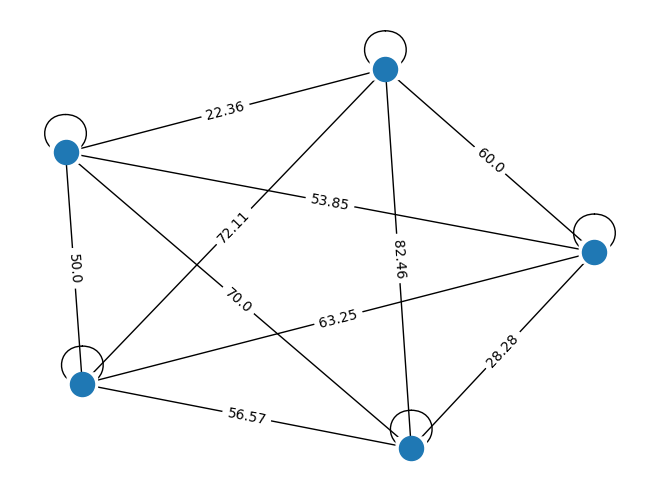

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

pos = {
    1: (10,30),
    2: (20,50),
    3: (50,90),
    4: (70,30),
    5: (90,50)
}

D = {}
for i in range(1,6):
  for j in range(1,6):
    xi,yi = pos[i]
    xj,yj = pos[j]
    d = np.round(np.sqrt((xi-xj)**2 + (yi-yj)**2),2)
    D[(i,j)] = d

print(D)
G = nx.Graph(D.keys(),peso=D.values())
pos = nx.spring_layout(G)
nx.draw(G,pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=D)
plt.show()

In [ ]:
from pyomo.environ import *

# create a model
model = ConcreteModel()

# declare decision variables
model.x = Var(D.keys(), domain=Binary)

# declare objective
model.util = Objective(expr = sum(D[k] * model.x[k] for k,v in D.items() if k[0] != k[1]), sense=minimize)

# declare constraints
model.r1 = ConstraintList()
for j in range(1,6):
  model.r1.add(expr = sum(model.x[(i,j)] for i in range(1,6) if i != j) == 1)

model.r2 = ConstraintList()
for i in range(1,6):
  model.r2.add(expr = sum(model.x[(i,j)] for j in range(1,6) if i != j) == 1)

def powerset(C):
    powerset = [[]]
    for e in C:
        subsets = []
        for subset in powerset:
            subsets = subsets + [subset + [e]]
        powerset = powerset + subsets
    return powerset

pset = powerset(range(1,6))

model.r3 = ConstraintList()
for s in pset:
  if len(s) > 1 and len(s) < 5:
    model.r3.add(expr = sum(model.x[(i,j)] for i in s for j in s if i != j ) <= len(s)-1)

model.pprint()

#msolver = SolverFactory('cbc', executable='/usr/bin/cbc')
msolver = SolverFactory('glpk', executable='/usr/bin/glpsol')
msolver.solve(model, tee=True)

# display solution
print('\nUtilidade = ', model.util())

print('\nDecision Variables')
for k,v in D.items():
  print(k,' = ', model.x[k]())

print('\nConstraints')
for j in range(1,6):
  print('R1.'+str(j)+' = '+str(model.r1[j]()))

for i in range(1,6):
  print('R2.'+str(i)+' = '+str(model.r1[i]()))

4 Set Declarations
    r1_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {1, 2, 3, 4, 5}
    r2_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {1, 2, 3, 4, 5}
    r3_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   25 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     2 :    Any :   25 : {(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)}

1 Var Declarations
    x : Size=25, Index=x_index
        Key    : Lower : Value : Upper : Fixed : Stale

## Problema da Mochila

$c_j$ = utilidade do objeto $j$

$p_j$ = peso do objeto $j$

$C_{max}$ = capacidade da mochila

$x_j$ = variável de decisão, assume 1 se objeto está na mochila e 0 caso contrário

$
\max z = \sum_{j=1}^{n} c_jx_j \\
s.t. \\
\sum_{j=1}^{n} p_jx_j \leq C_{max} \\
x_j \in \{0,1\}
$

É um PLB, mas pode ser formulado como um problema de **programação inteira** se $x_j$ corresponder ao número de objetos do tipo $j$ colocados na mochila (pode-se levar mais de um objeto do mesmo tipo).

É curioso que um problema tão simples não tenha solução em tempo polinomial conhecida.

### Exemplo

Um alpinista deseja escolher quais objetos carregar na mochila a fim de maximizar a sua utilidade. Para cada possível objeto, o alpinista atribui uma nota em função de sua utilidade, conforme mostra a tabela abaixo. O peso de cada objeto também está ilustrado na mesma tabela. O peso máximo que o alpinista pode carregar é de 5 kg. Modele o problema da mochila.

|Objeto|	Utilidade|	Peso (g)|
|---|---|---|
|Barra de cereal|	6|	200|
|Casaco|	7|	400|
|Tênis|	3|	400|
|Celular|	2|	100|
|Água|	9|	1.000|
|Protetor solar|	5|	200|
|Protetor labial|	2|	30|
|Garrafas de oxigênio|	10|	3.000|
|Máquina fotográfica|	6|	500|

$u_j$ = é a utilidade do objeto

$p_j$ = é o peso do objeto

$C_{max}$ = capacidade da mochila

$x_j$ = variável binária que assume 1 se o objeto é escolhido e 0 em outro caso

$\max \sum_j u_j x_j \\
s.t.\\
\sum_j p_jx_j \leq C_{max} \\
x_j \in \{0,1\}$

In [ ]:
from pyomo.environ import *

# create a model
model = ConcreteModel()

utilidade = [6,7,3,2,9,5,2,10,6]
peso = [200,400,400,100,1000,200,30,3000,500]
cmax = 5000
objetos = {
    "Barra":[6,200],
    "Casaco":[7,400],
    "Tenis":[3,400],
    "Celular":[2,100],
    "Água":[9,1000],
    "Protetor solar":[5,200],
    "Protetor labial":[2,30],
    "Garrafas de oxigênio":[10,3000],
    "Máquina fotográfica":[6,500]
}

# declare decision variables
model.x = Var(objetos.keys(), domain=Binary)

# declare objective
model.util = Objective(expr = sum(v[0] * model.x[k] for k,v in objetos.items()), sense=maximize)

# declare constraints
model.r1 = Constraint(expr = sum(v[1] * model.x[k] for k,v in objetos.items()) <= cmax)

model.pprint()

#msolver = SolverFactory('cbc', executable='/usr/bin/cbc')
msolver = SolverFactory('glpk', executable='/usr/bin/glpsol')
msolver.solve(model, tee=True)

# display solution
print('\nUtilidade = ', model.util())

print('\nDecision Variables')
for k,v in objetos.items():
  print(k,' = ', model.x[k]())

print('\nConstraints')
print('R1  = ', model.r1())

1 Set Declarations
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    9 : {'Barra', 'Casaco', 'Celular', 'Garrafas de oxigênio', 'Máquina fotográfica', 'Protetor labial', 'Protetor solar', 'Tenis', 'Água'}

1 Var Declarations
    x : Size=9, Index=x_index
        Key                  : Lower : Value : Upper : Fixed : Stale : Domain
                       Barra :     0 :  None :     1 : False :  True : Binary
                      Casaco :     0 :  None :     1 : False :  True : Binary
                     Celular :     0 :  None :     1 : False :  True : Binary
        Garrafas de oxigênio :     0 :  None :     1 : False :  True : Binary
         Máquina fotográfica :     0 :  None :     1 : False :  True : Binary
             Protetor labial :     0 :  None :     1 : False :  True : Binary
              Protetor solar :     0 :  None :     1 : False :  True : Binary
                       Tenis :     0 :  N